<a href="https://colab.research.google.com/github/ylnaud/colab/blob/main/learner_notebook_full_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

**Let's first analyse and understand our client expectations :**

*They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience*

Restating their objectifs to ensure we have undertoofd them correctly:

Our client wants to improve the customer experience at restaurants by gaining better insights into the demand for the restaurants subscribed to their aggregator platform and app, FoodHub. These restaurants are located in New York. To achieve this, they want us to analyze the data they have provided.

**"the demand of different restaurants" means : the number of customers who want to eat at a specific restaurant at a particular time.**

**Analyzing restaurant demand involves understanding the following topics:**

**Popularity: How busy are the restaurants at different times of the day, days of the week, and times of the year?**
**Customer preferences: What dishes or types of cuisine are most popular with customers?**
**Buying patterns: How do customers spend their money at restaurants?**

We can now start our mission!

### Let us start by importing the required libraries

In [ ]:
# Installing panda==2.0.3 instead, because panda 1.5.3 was incompatible with cudata-cu12 24.4.1, and was causing issues.
!pip uninstall pandas -y
!pip install pandas==2.0.3

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 -q --user

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# command to tell Python to display the graphs
%matplotlib inline

In [ ]:
# restricting the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [ ]:
# uncommenting and runing the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data
data = pd.read_csv('/content/drive/MyDrive/Python Course/FoodHub Data Analysis/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print('There are',data.shape[0], 'rows, and', data.shape[1], 'columns present in the data.')

There are 1898 rows, and 9 columns present in the data.


#### Observations for question 1 and data.head():

*   The dataset is relatively large. Its 1898 entries (orders) could represent a substantial amount of data to analize trends and patterns.
*   The nine columns of the dataset contain information about the orders, such as the order ID and the ID of the customer who placed it,the restaurant name, the food type, the price, the customer rating, the day of the week, and the time taken to prepare and deliver the food.
*   The 'rating' column contains some entries marked as "Not given" (missing values). Additionally, the remaining ratings lack detailed information about the customers' experience.
*   The 'day_of_the_week' column contains only two unique values : "Weekend" and "Weekday". There is no information available about the specific time of the day when the orders were placed, nor any details about the time of year.
*   The dataset doesn't provide any insight about the timeframe it covers.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   All the columns have 1898 non-null entries, corresponding to the 1898 rows in the dataset, suggesting there may be no missing data.
*   There are 5 numerical columns and 4 object(string) type columns in the dataset.
*   The 'order_id' and 'customer_id' columns are being read as an 'object' data type. They should ideally be of string type.
*   The 'rating' column is also being read as an 'object' data type. The presence of 'not given' values (missing value) has resulted in the entire column being treated as a string data type when it should ideally be of integer type (represening the rating scores).  This column might requires closer inpection due to the significant number of misisng values.
*   Do the 'food_preparation_time' and 'delivery_tyme' columns should ideally be of 'datatime.time' class?
Let's convert the 'order_id' and 'customenr_id' columns to string data type.

In [ ]:
# converting the 'order_id' and 'customer_id' columns from integer to string data type
data[['order_id', 'customer_id']] = data[['order_id', 'customer_id']].astype(str)
print (data.dtypes)

order_id                  object
customer_id               object
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


Observations:

*   The 'customer_id' and the 'order_id' are identifiers. They are not intended to be used for mathematical operations.
*    Converting them to string data type will prevent any accidental arithmetic operations and statistical analyze.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:

*   The above output does not show any missing values (all the columns have an entry in each row). Nevertheless, the output of 'data.head()' showed that the 'rating' column contains some 'Not given' entries, which represent missing values.

Let's take a deeper analysis of this column by looking for unique values.Élément de liste




In [ ]:
unique_values_count = data['rating'].value_counts()

print("Count of each unique value in the 'rating' column outputs:")
print(unique_values_count)

Count of each unique value in the 'rating' column outputs:
rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


#### Observations:

*   The 'rating' column contains both integers and strings. Unlike a list, a column in Python's data structures, such as those in pandas DataFrames, can only have one data type at a time. Python considers this column as having strings due to the presence of both data types, which could lead to errors if the data is not carefully studied.

Let's replace the 'Not given' entries with 'nan', convert the column to float, and then convert the 'nan' values to nullable integers.

In [ ]:
# replacing 'Not given' with 'nan' and converting the column to float
data['rating']=data['rating'].replace('Not given',np.nan).astype(float)

In [ ]:
# replacing the 'nan' by the Nullable Integer data type (Int64)
data['rating'] = data ['rating'].astype('Int64')
print("\nDataFrame after converting 'rating', to nullable integer type Int64:")
print(data)


DataFrame after converting 'rating', to nullable integer type Int64:
     order_id customer_id                        restaurant_name  \
0     1477147      337525                                Hangawi   
1     1477685      358141              Blue Ribbon Sushi Izakaya   
2     1477070       66393                            Cafe Habana   
3     1477334      106968              Blue Ribbon Fried Chicken   
4     1478249       76942                       Dirty Bird to Go   
...       ...         ...                                    ...   
1893  1476701      292602  Chipotle Mexican Grill $1.99 Delivery   
1894  1477421      397537                              The Smile   
1895  1477819       35309                      Blue Ribbon Sushi   
1896  1477513       64151                      Jack's Wife Freda   
1897  1478056      120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week  rating  \
0            Korean              30.75         

#### Observations:

*   Converting the column to float allows flexibility in handling both numeric and 'nan' values.
*   Converting the 'nan' to Nullable integer ('Int64'), afterwasd, provides more specific data control. This improuves computational efficiency, and ensures compatibility with numerical operations in the data analysis workflows.
*   We will decide later whether (and how) to impute these values.
Let's double check the dataset.

In [ ]:
# double checking the whole dataset
def type_counts(data):
    type_counts_dict = {}
    for col in data.columns:
        type_counts_dict[col] = data[col].apply(type).value_counts()
    return pd.DataFrame(type_counts_dict).fillna(0).astype(int)

# Get type counts for the DataFrame
type_counts_data = type_counts(data)

print(type_counts_data)

                                       order_id  customer_id  restaurant_name  \
<class 'str'>                              1898         1898             1898   
<class 'float'>                               0            0                0   
<class 'int'>                                 0            0                0   
<class 'pandas._libs.missing.NAType'>         0            0                0   

                                       cuisine_type  cost_of_the_order  \
<class 'str'>                                  1898                  0   
<class 'float'>                                   0               1898   
<class 'int'>                                     0                  0   
<class 'pandas._libs.missing.NAType'>             0                  0   

                                       day_of_the_week  rating  \
<class 'str'>                                     1898       0   
<class 'float'>                                      0       0   
<class 'int'>            

#### Observations:

*   All the columns now have the correct data type.
*   As expected, the 'rating' column contains 1162 entries of integer data type and 736 entries of nullable integer data type.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# getting the statistical summary of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [ ]:
print('The minimum time it takes for food to be prepared is :', data['food_preparation_time'].min())
print('The average time it takes for food to be prepared is : {:.2f}'.format(data['food_preparation_time'].mean()))
print('The maximum time it takes for food to be prepared is :', data['food_preparation_time'].max())

The minimum time it takes for food to be prepared is : 20
The average time it takes for food to be prepared is : 27.37
The maximum time it takes for food to be prepared is : 35


#### Observations:

*   The 'order_id' and 'customer_id' columns wouldn't provide meaningful statistical information as integers, so they were converted to strings.
*   The statistical values for the 'food_preparation_time' and 'delivery_time' columns are in minutes and hundredths of minutes, not minutes and seconds. This might not affect the study, we want just to point it out. Besides, converting them to datetime.time data type did not change anything.

In [ ]:
# calculating statistics on the original columns
stats = data.describe().T

# function to convert decimal minutes to minutes and seconds
def convert_to_mmss(decimal_minutes):
    # Handle potential non-numeric values
    if not isinstance(decimal_minutes, (float, int)):
        return decimal_minutes
    minutes = int(decimal_minutes)
    seconds = (decimal_minutes - minutes) * 60
    return f"{minutes} minutes and {int(seconds)} seconds"

# applying custom formatting to specific columns
# Use .loc with index label for 'food_preparation_time' and column label for 'mean'
stats.loc['food_preparation_time', 'mean'] = convert_to_mmss(stats.loc['food_preparation_time', 'mean'])
stats.loc['delivery_time', 'mean'] = convert_to_mmss(stats.loc['delivery_time', 'mean'])

stats.loc['food_preparation_time', 'std'] = convert_to_mmss(stats.loc['food_preparation_time', 'std'])
stats.loc['delivery_time', 'std'] = convert_to_mmss(stats.loc['delivery_time', 'std'])

stats.loc['food_preparation_time', 'min'] = convert_to_mmss(stats.loc['food_preparation_time', 'min'])
stats.loc['delivery_time', 'min'] = convert_to_mmss(stats.loc['delivery_time', 'min'])

stats.loc['food_preparation_time', '25%'] = convert_to_mmss(stats.loc['food_preparation_time', '25%'])
stats.loc['delivery_time', '25%'] = convert_to_mmss(stats.loc['delivery_time', '25%'])

stats.loc['food_preparation_time', '50%'] = convert_to_mmss(stats.loc['food_preparation_time', '50%'])
stats.loc['delivery_time', '50%'] = convert_to_mmss(stats.loc['delivery_time', '50%'])

stats.loc['food_preparation_time', '75%'] = convert_to_mmss(stats.loc['food_preparation_time', '75%'])
stats.loc['delivery_time', '75%'] = convert_to_mmss(stats.loc['delivery_time', '75%'])

stats.loc['food_preparation_time', 'max'] = convert_to_mmss(stats.loc['food_preparation_time', 'max'])
stats.loc['delivery_time', 'max'] = convert_to_mmss(stats.loc['delivery_time', 'max'])

# Print the statistical summary
print("\nStatistical summary of food preparation and delivery times (in minutes and seconds):")
print(stats)


Statistical summary of food preparation and delivery times (in minutes and seconds):
                        count                       mean  \
cost_of_the_order     1898.00                      16.50   
rating                1162.00                       4.34   
food_preparation_time 1898.00  27 minutes and 22 seconds   
delivery_time         1898.00   24 minutes and 9 seconds   

                                            std                       min  \
cost_of_the_order                          7.48                      4.47   
rating                                     0.74                      3.00   
food_preparation_time  4 minutes and 37 seconds  20 minutes and 0 seconds   
delivery_time          4 minutes and 58 seconds  15 minutes and 0 seconds   

                                            25%                       50%  \
cost_of_the_order                         12.08                     14.14   
rating                                     4.00                      5.00

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# there are 736 orders that are not rated (see above :[16]). Let's verify it with the isnull code :
data.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:

*  The number of unrated orders is quite hight. It represents almost 39 % of the 'rating' column. This number corresponds to the 'Not givent' entries that have been converted into nullable integer (int64)

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

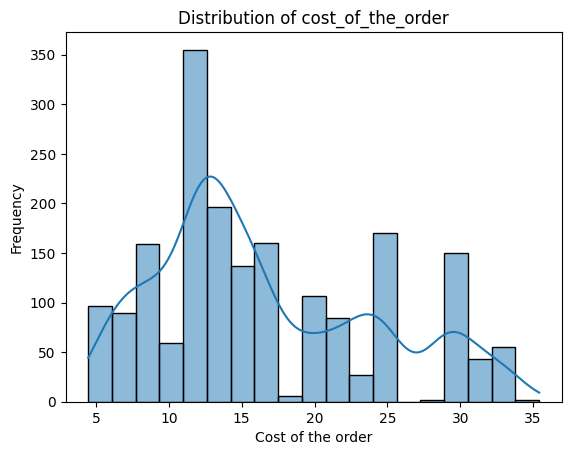

In [ ]:
# let's explore the distribution of the 'cost_of_the_order' with a histplot chart :
sns.histplot(data=data, x='cost_of_the_order', kde=True)
plt.title('Distribution of cost_of_the_order')
plt.xlabel('Cost of the order')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='cost_of_the_order'>

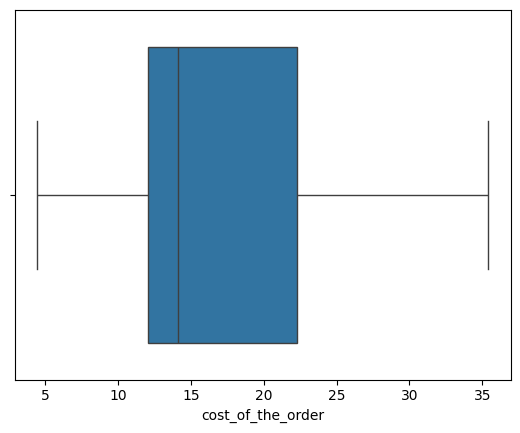

In [ ]:
# visualising the spread and identifying outliers :
sns.boxplot(data=data, x='cost_of_the_order')

#### Observations:


*   The order prices vary from 4.50 to 35.50 dollars.
*   The median value is around 14.10 dollars.
*   The mode value is 12.20 dollars.
*   The mean value is 16.50 dollars.
*   The distribution of the data is right skewed.
*   There are 2 valleys on the right side of the KDE curve in the following ranges: (17.00–20.00) dollars and (26.00–27.00) dollars. The first valley is due to very low prices, and the second valley is due to both a very low price rate and the absence of prices in that range.
*   There are not outliers.



/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


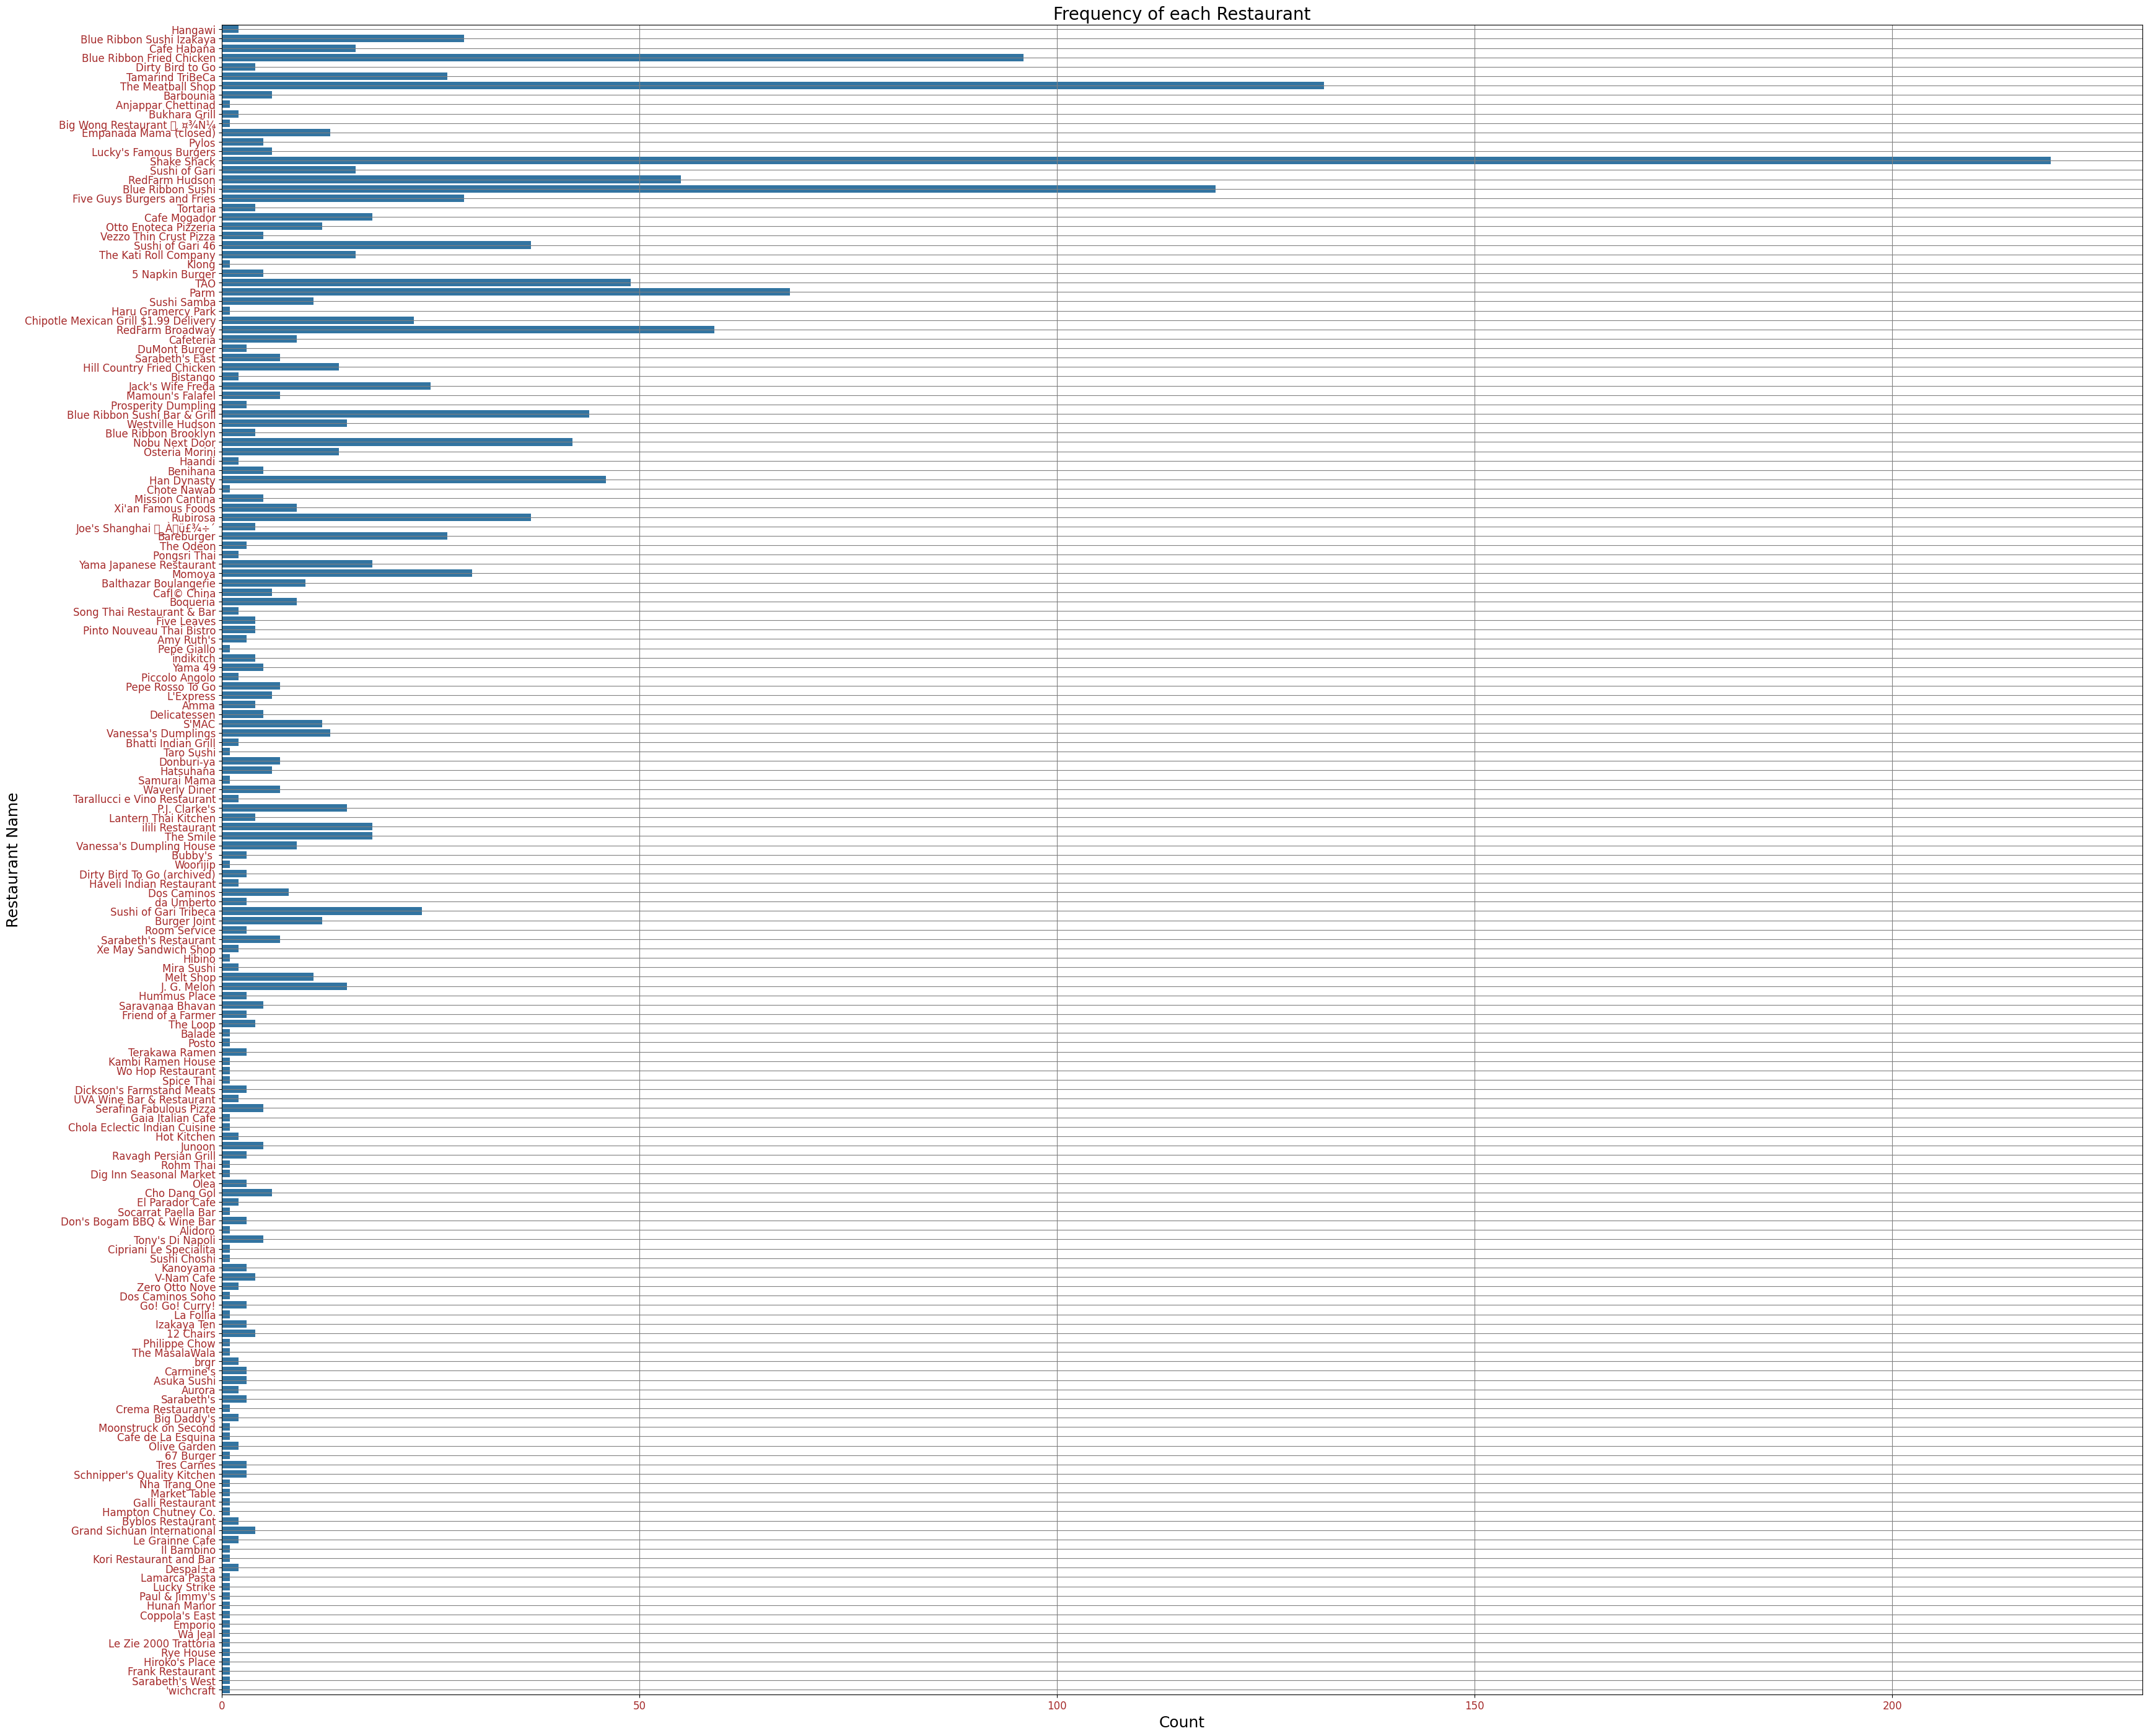

In [ ]:
# counting categodical data :
## counting and compering the frequency of the restaurants:
plt.figure(figsize=(40,35))
sns.countplot(y=data['restaurant_name'])
plt.title('Frequency of each Restaurant', fontsize=20)
plt.xlabel('Count', fontsize=18)
plt.ylabel('Restaurant Name', fontsize=18)
plt.yticks(fontsize=12,color='brown')
plt.xticks(fontsize=12,color='brown')
plt.grid(True, color='gray')
plt.grid(True)
plt.show();

#### Observations:

*   Élément de liste
*   Élément de liste

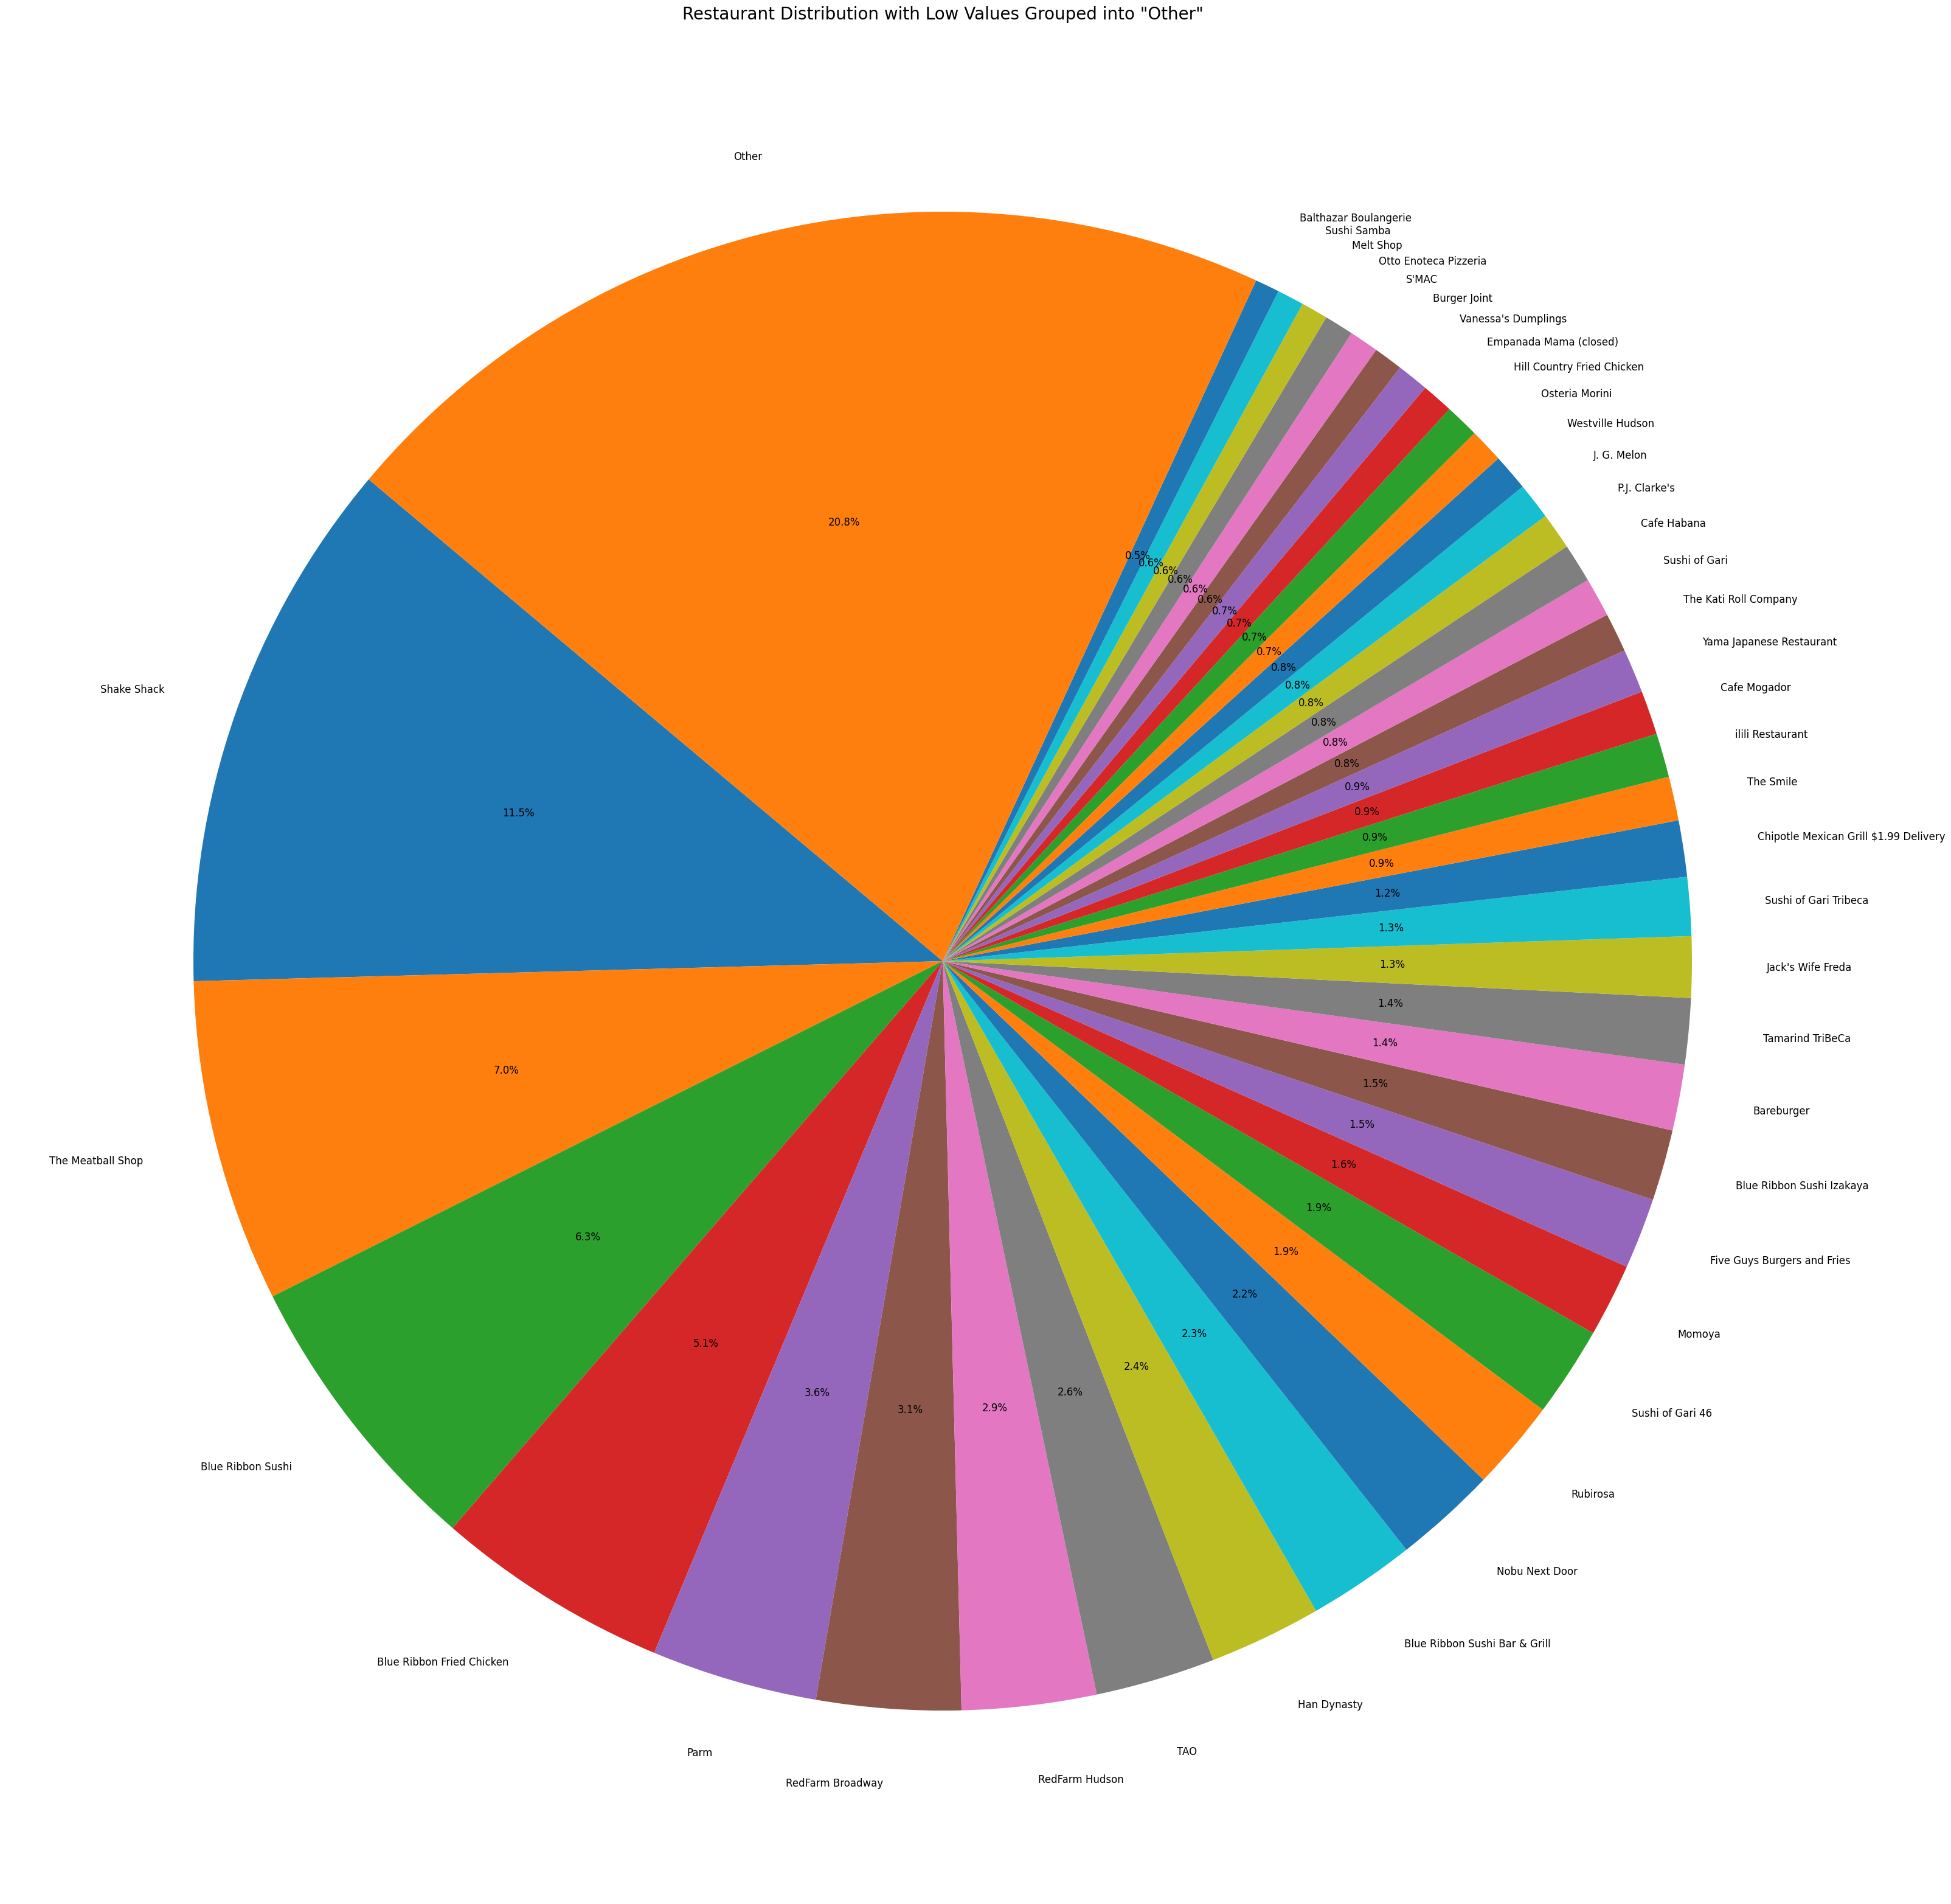

In [ ]:
# analysing the proportions among the restaurants
# setting a threshold for grouping the lowest values
threshold = 10

# counting the occurrences of each restaurant
restaurant_counts = data['restaurant_name'].value_counts()

# identifying restaurants to group into "Other"
low_value_restaurants = restaurant_counts[restaurant_counts < threshold]

# calculating the sum of the low-value restaurants
other_sum = low_value_restaurants.sum()

# filtering out the low-value restaurants from the original Series
filtered_counts = restaurant_counts[restaurant_counts >= threshold]

# adding the "Other" category
filtered_counts['Other'] = other_sum

# plotting the pie chart
plt.figure(figsize=(40, 40))
# Capture the return values from plt.pie()
patches, texts, autotexts = plt.pie(filtered_counts, labels=filtered_counts.index, autopct='%1.1f%%', startangle=140)

# customizing the font size of the labels and percentages
for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.title('Restaurant Distribution with Low Values Grouped into "Other"', fontsize=20)
plt.show()

#### Observations:

*   The restaurants receiving the most orders are :
    1.   Shake Shack with 11.50% of placed orders,
    2.   The Meatball Shop with 7.0 % of placed orders,
    3.   Blue Ribbon Sushi with 6.3% of placed orders,
    4.   Blue Ribbon Fried Chicken with 5.1% of placed orders,
*   We can distinguish three groups of restaurants within the rnages of (3.6 - 2.2)%, (1.9 - 1.2)% and (0.9 - 0.5)%
*   Finally, 20.8% of restaurants have received a maximum of 10 orders.
*   There is not a big difference on the numnber of orders received by the 2nd, 3rd and 4th restaurants, but the 1st one receives twice as mmany order as the 4th one.
*   It might be interesting to look for any correlation beteew this distribution and: the 'rating', 'the_day_of_the_week' as well as the 'cuisine_type'.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


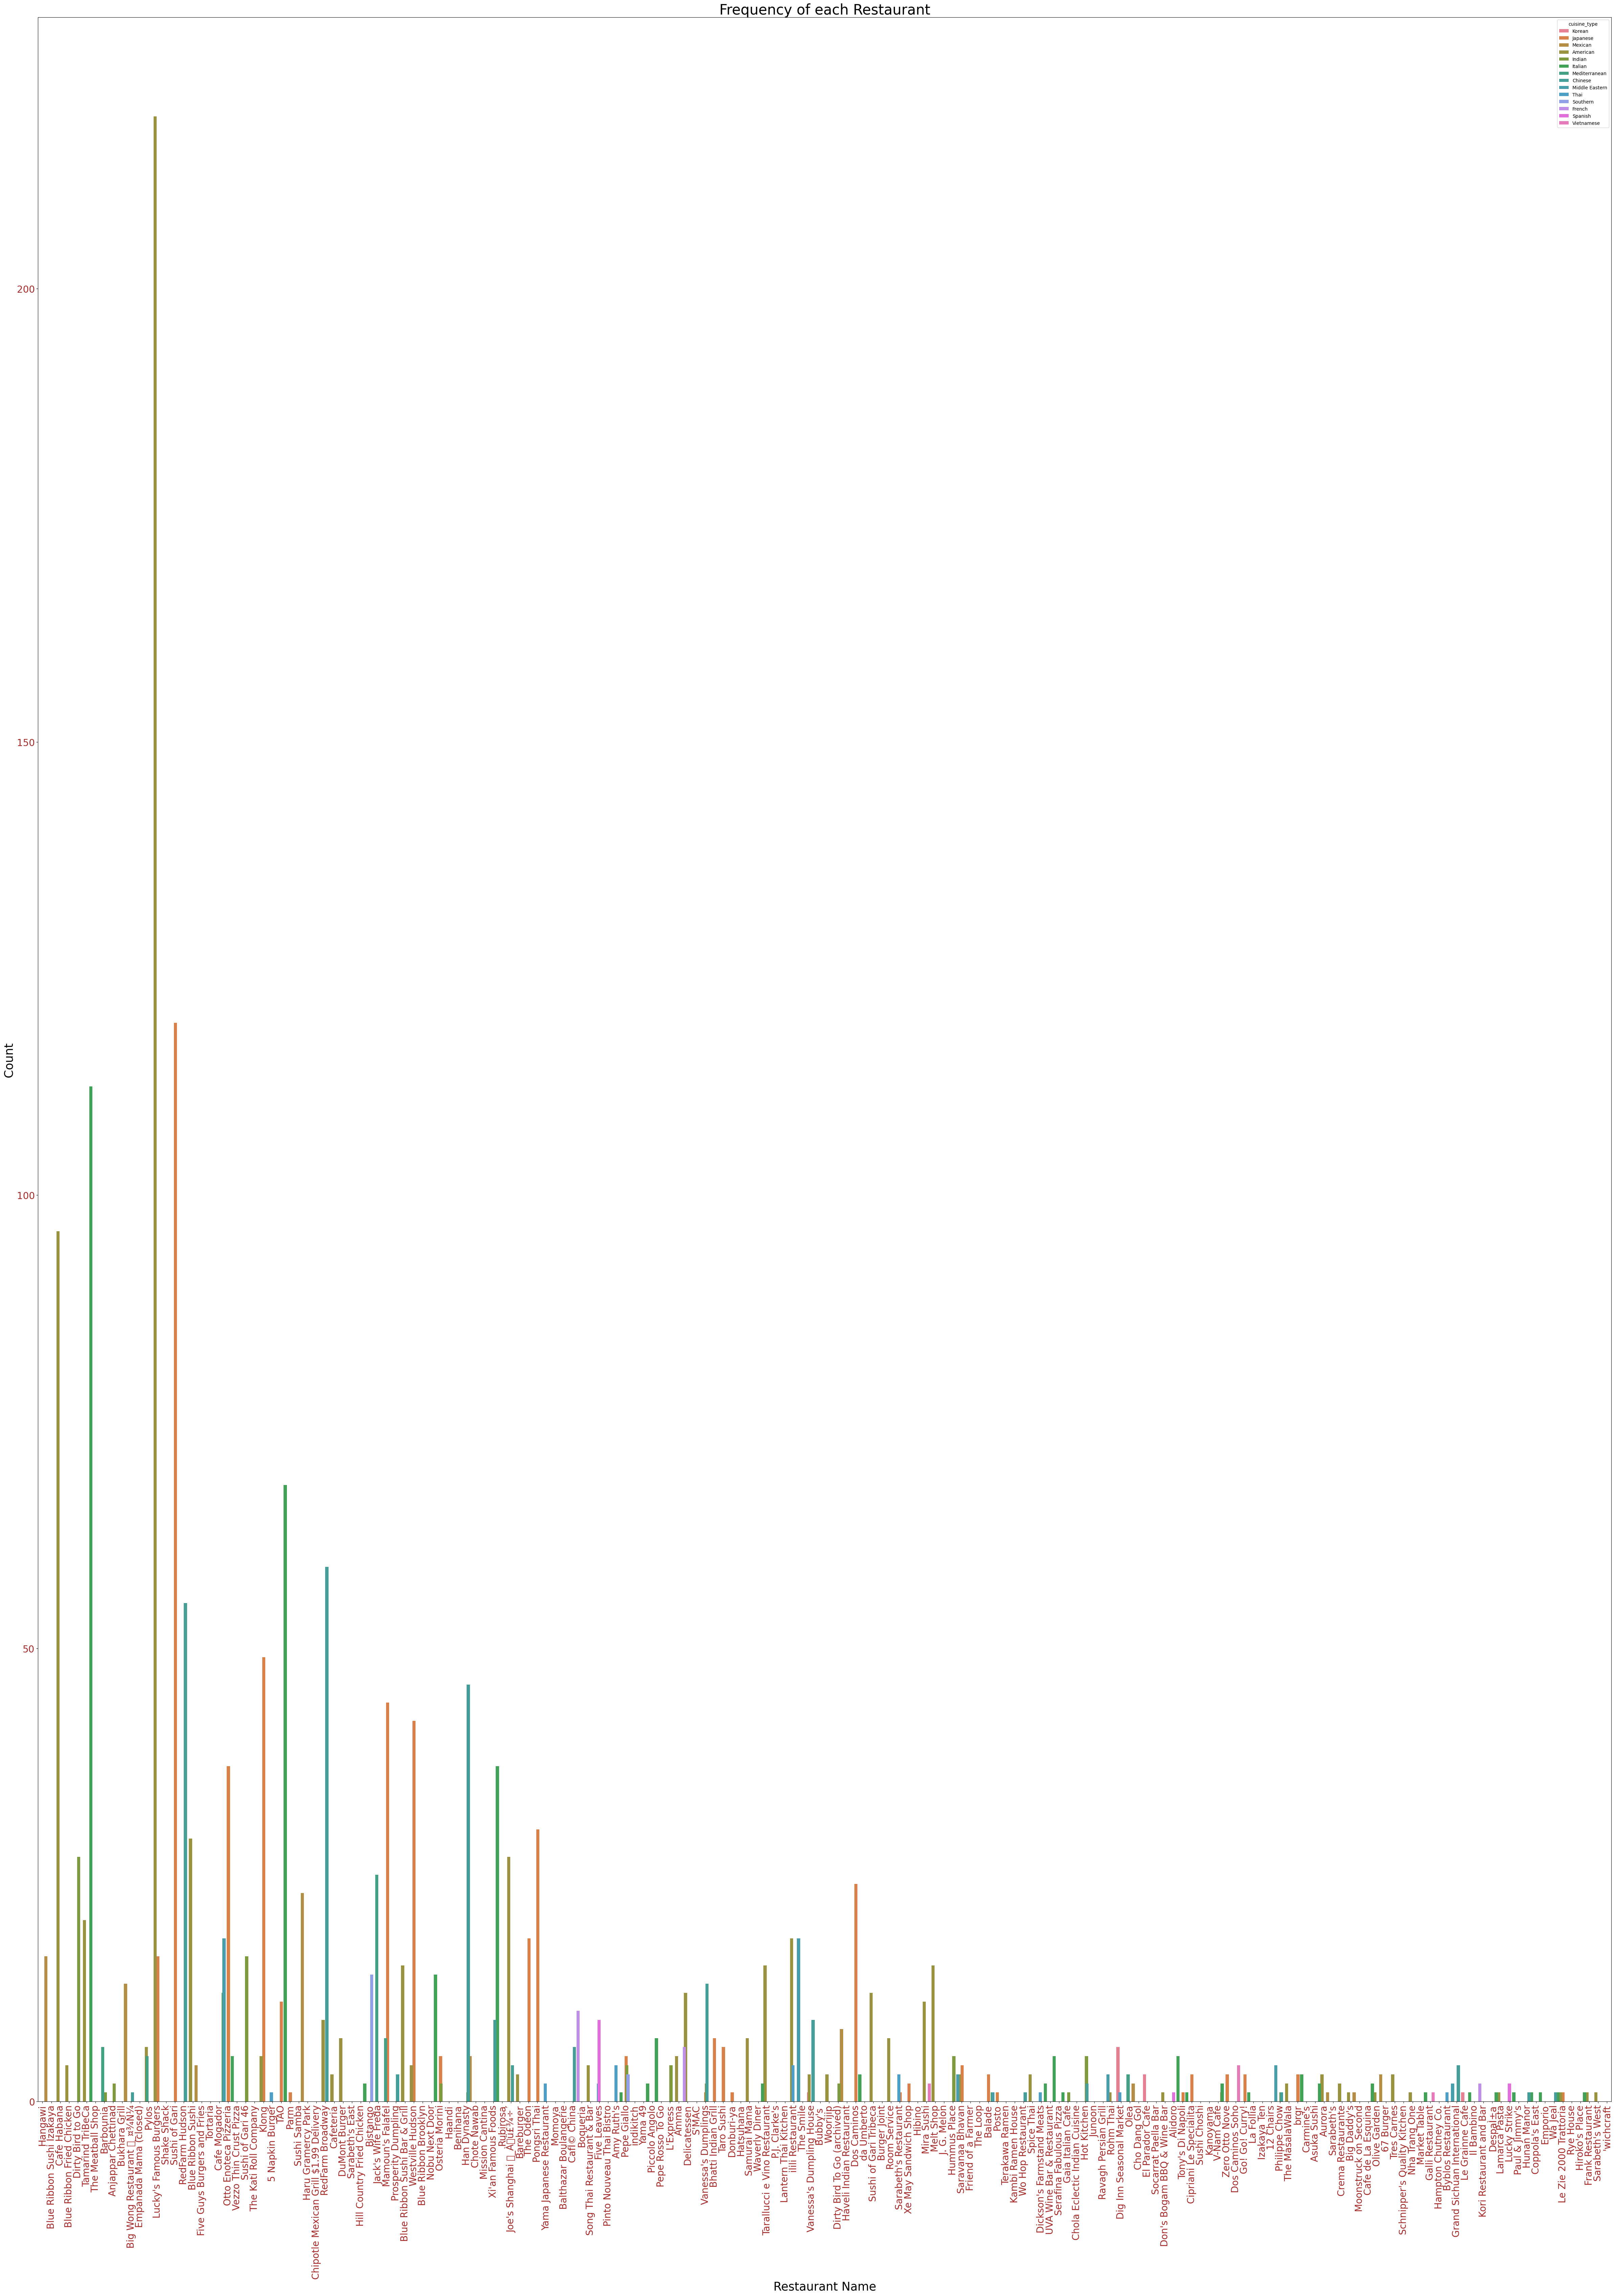

In [ ]:
# counting categodical data :
## counting and compering the frequency of the restaurants:
plt.figure(figsize=(60,80))
sns.countplot(data=data,x=('restaurant_name'), hue='cuisine_type', width=5)
plt.title('Frequency of each Restaurant', fontsize=30)
plt.xlabel('Restaurant Name', fontsize=25)
plt.ylabel('Count', fontsize=25)
plt.yticks(fontsize=20,color='brown')
plt.xticks(fontsize=20,color='brown')
plt.xticks(rotation=90)
plt.show();

#### Observations:

*   Élément de liste
*   Élément de liste



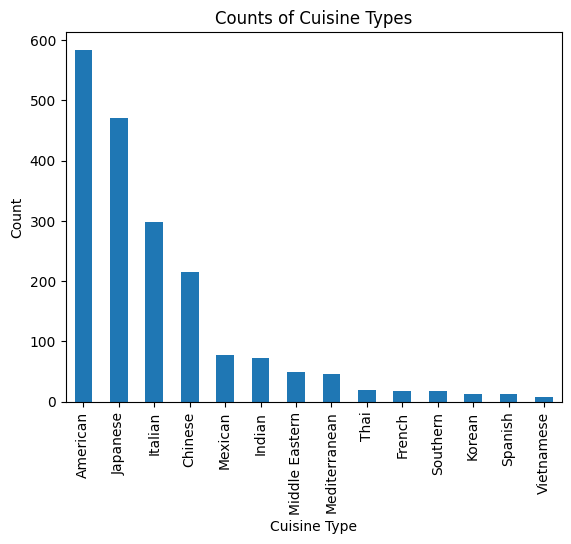

In [ ]:
# counting and comparing the cuisine_type
data['cuisine_type'].value_counts().plot.bar()
plt.title('Counts of Cuisine Types')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.show()

#### Observations:

*   Élément de liste
*   Élément de liste

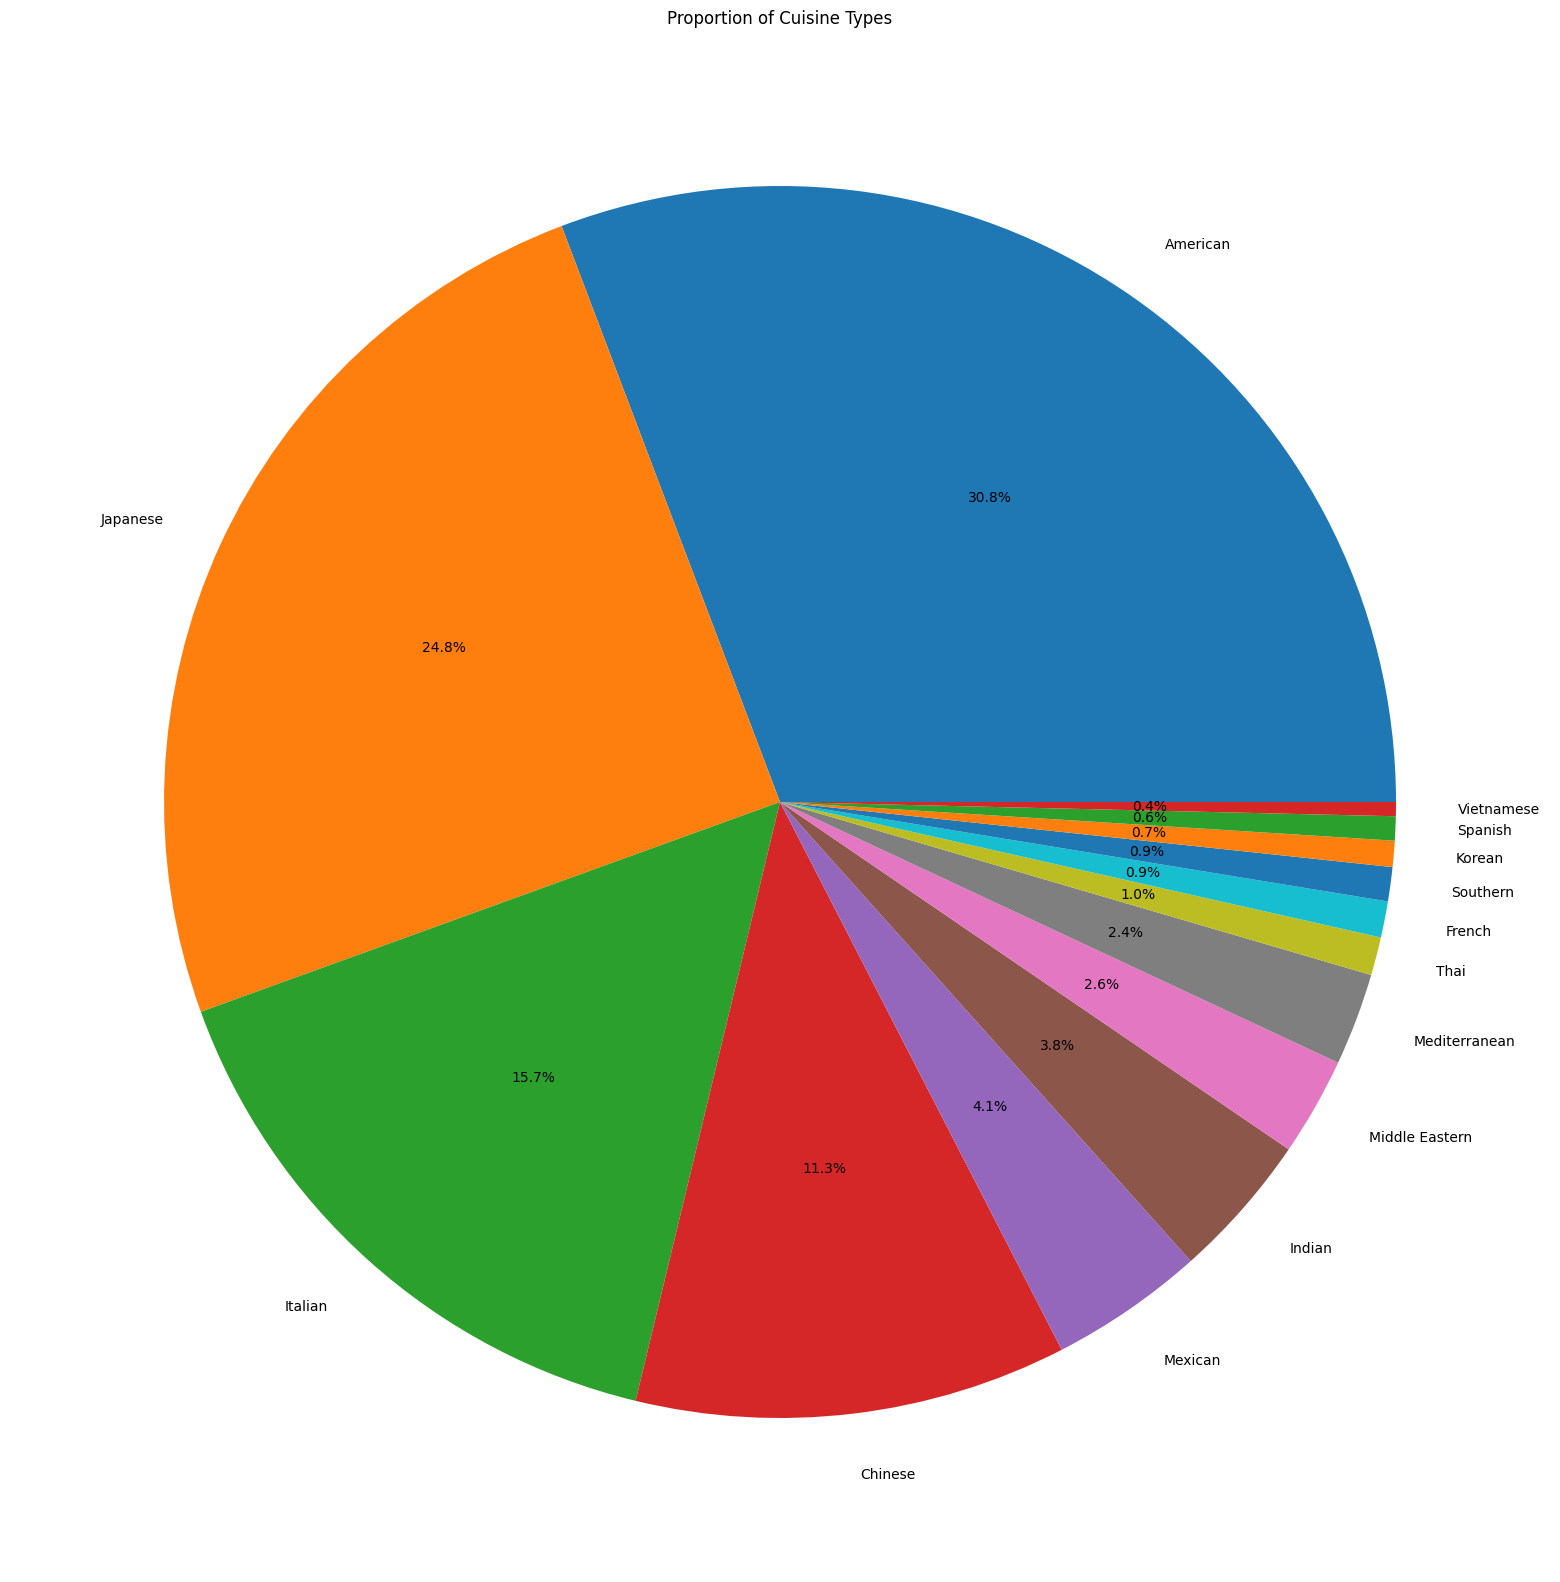

In [ ]:
# analysing the proportions among the cuisine_type
plt.figure(figsize=(20,20))
data['cuisine_type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Cuisine Types')
plt.ylabel('')
plt.show()

#### Observations:

*   Élément de liste
*   Élément de liste

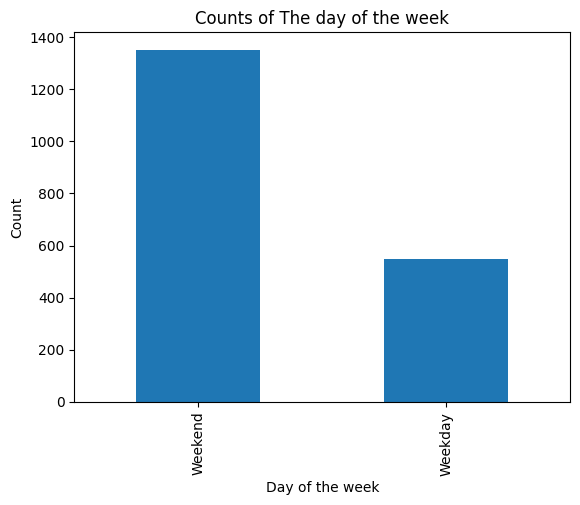

In [ ]:
# count and compering the frequency of orders by "day_of_the_week"
data['day_of_the_week'].value_counts().plot.bar()
plt.title('Counts of The day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Count')
plt.show()

#### Observations:

*   Élément de liste
*   Élément de liste

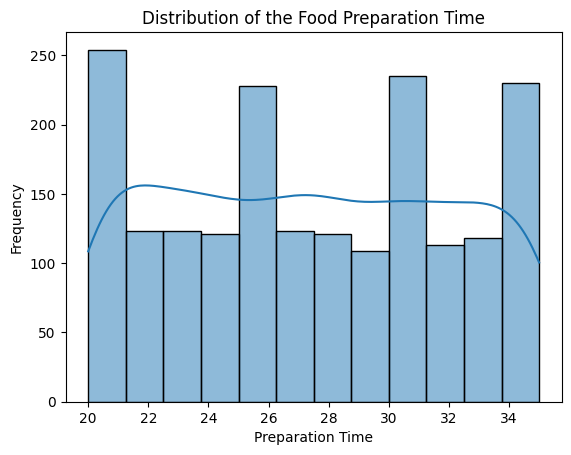

In [ ]:
# let's explore the distribution of the 'food_preparation_time' with a histplot chart :
sns.histplot(data=data, x='food_preparation_time', kde=True)
plt.title('Distribution of the Food Preparation Time')
plt.xlabel('Preparation Time')
plt.ylabel('Frequency')
plt.show()

#### Observations:

*   Élément de liste
*   Élément de liste

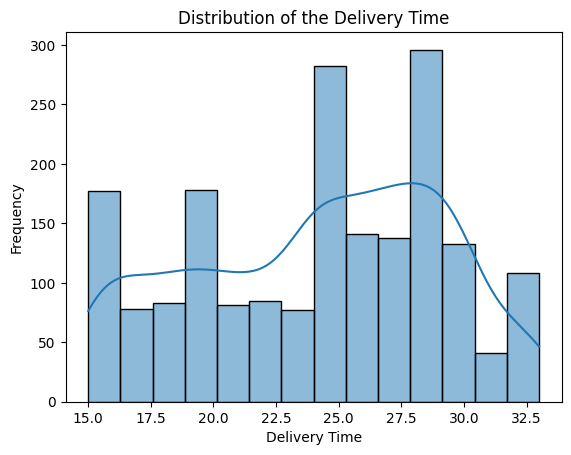

In [ ]:
# let's explore the distribution of the 'food_preparation_time' with a histplot chart :
sns.histplot(data=data, x='delivery_time', kde=True)
plt.title('Distribution of the Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.show()

#### Observations:

*   Élément de liste
*   Élément de liste

#### Observations:

*   Élément de liste
*   Élément de liste

In [ ]:
# Customers frequency (grouped by the same value in order to reduce the size of the graph)
# Counting the customer frequency and create a new column
# Calculating the frequency of each customer_id
customer_frequency = data['customer_id'].value_counts()

# Maping the frequency to a new column in the original DataFrame
data['customer_frequency'] = data['customer_id'].map(customer_frequency)

# Displaying the first few rows to verify the new column
print(data.head())

NameError: name 'data' is not defined

In [ ]:
# how many customers are present in the data
print('There are',data['customer_id'].nunique(), 'customers in the data')

print(data['customer_id'].value_counts())

There are 1200 customers in the data
customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64


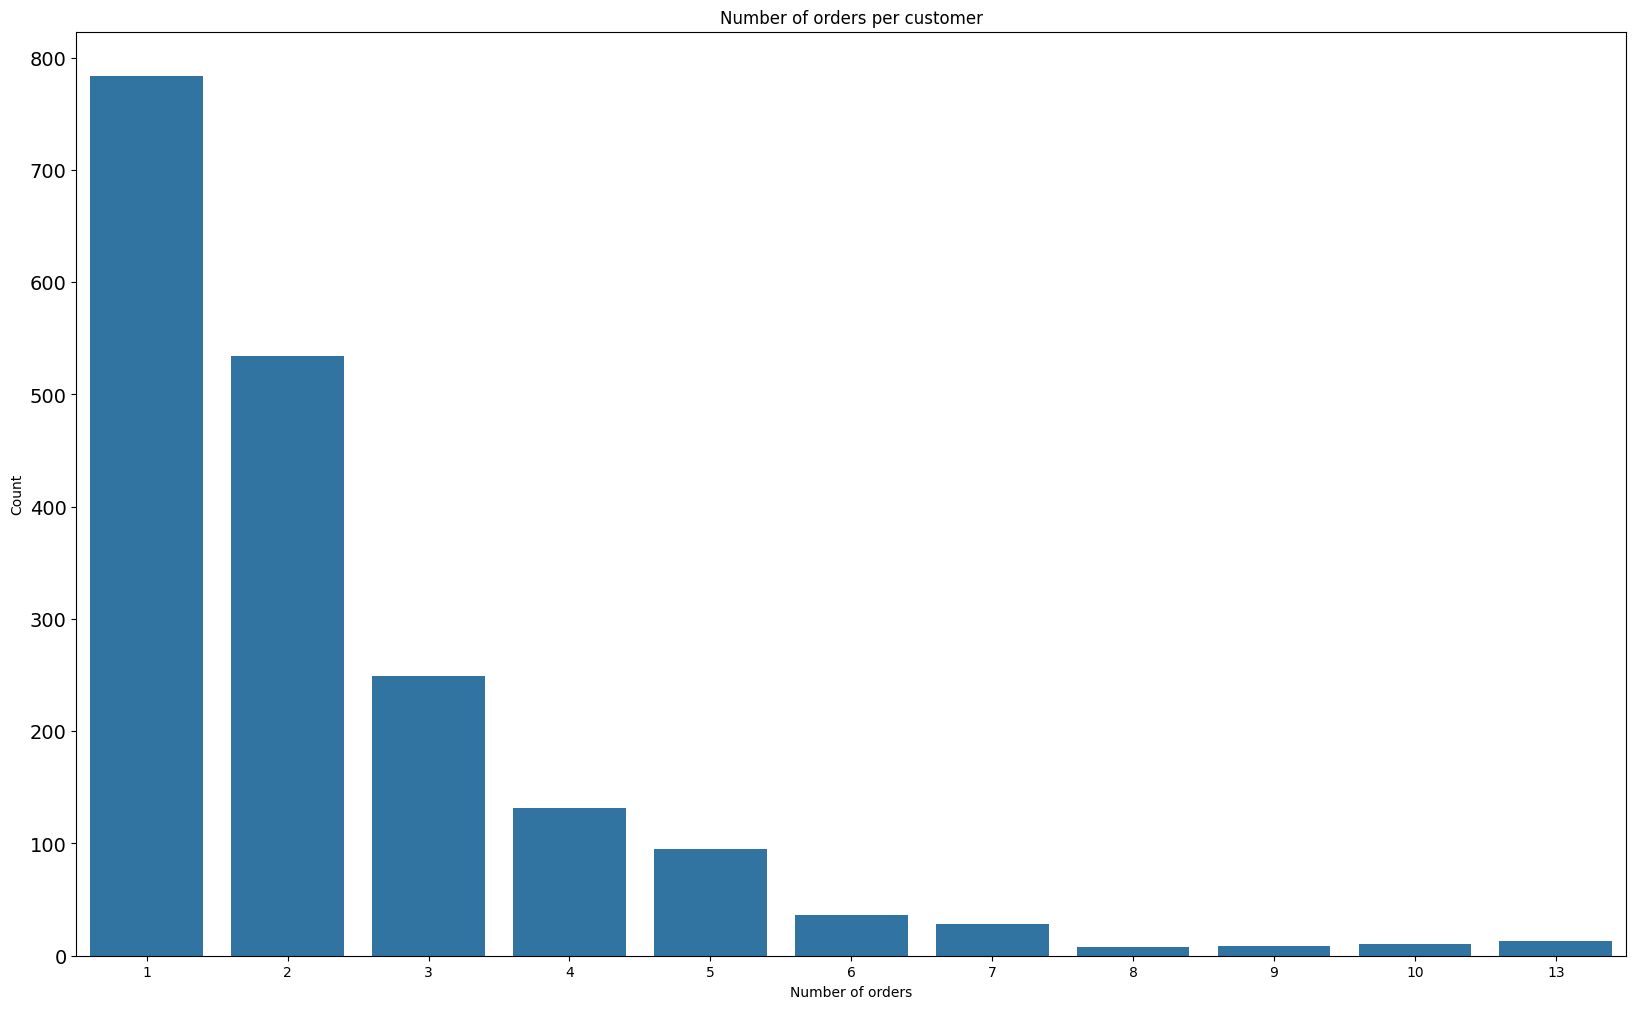

In [ ]:
# number of orders
plt.figure(figsize=(20,12))
sns.countplot(data=data, x='customer_frequency')
plt.title('Number of orders per customer')
plt.xlabel('Number of orders')
plt.ylabel('Count')
plt.yticks(fontsize=14)
plt.show()

Observations:


*   There are 1200 customers in the dataset. they are represented on the x-axis.
*   The number of orders each customer has placed varies from 1 (most of the customers) to 13 (for just one customer, likely an outlier).
*    Without information on the timeframe covered by the dataset, it is impossible to determine the frequency accurately over any period.

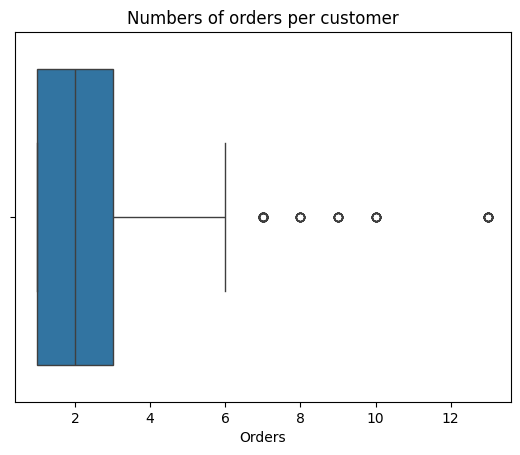

In [ ]:
# boxplot
# data['orders_bins']=pd.cut(data['customer_frequency'],bins=[0,1,2,3,4,5,6,7,8,9,10,13], labels=['K','J','I','H','G','F','E','D','C', 'B', 'A'], right=True)
sns.boxplot(data=data, x='customer_frequency')

plt.title('Numbers of orders per customer')
plt.xlabel('Orders')
plt.yticks(fontsize=14)
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

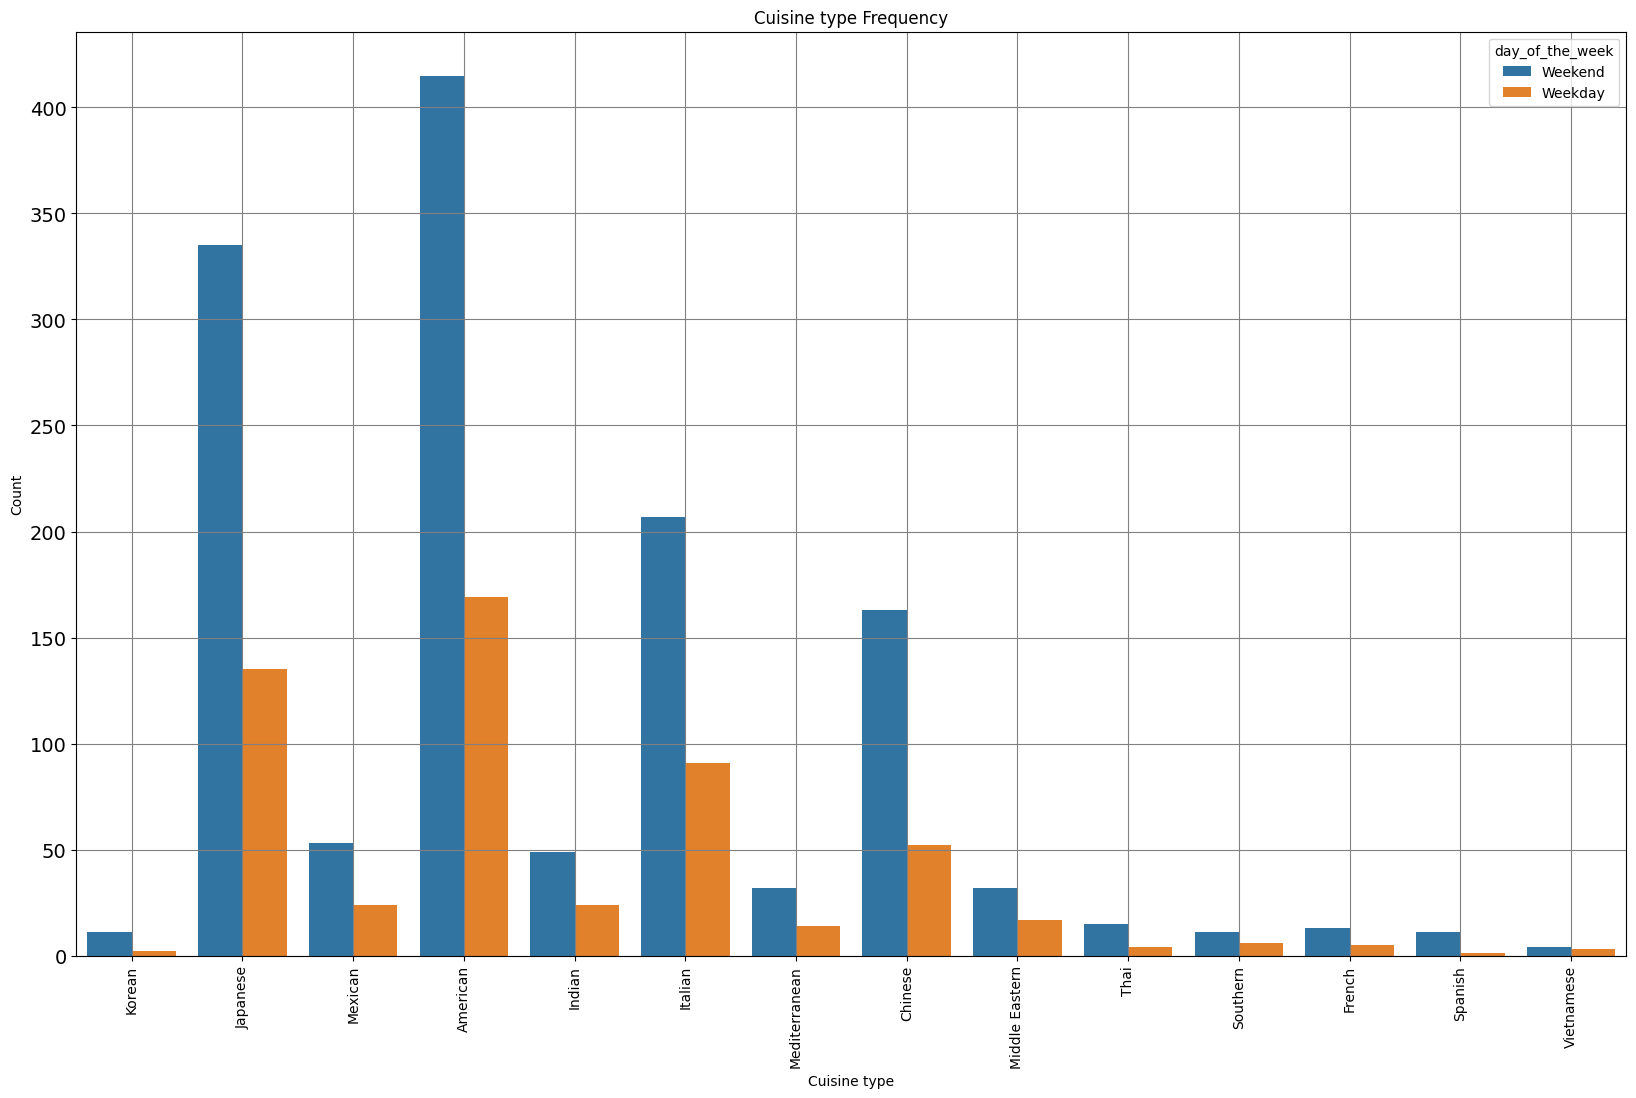

In [ ]:
# Frequenzy of the cuisine type per day of the week
plt.figure(figsize=(20,12))
sns.countplot(data=data, x='cuisine_type',hue='day_of_the_week')
plt.title('Cuisine type Frequency')
plt.xlabel('Cuisine type')
plt.ylabel('Count')
plt.yticks(fontsize=14)
plt.xticks(rotation=90)
plt.grid(True, color='gray')
plt.show()

#### Observations:

The most popular cuisines on the weekends are by order:

1.   American
2.   Japanesse
3.   Italian
4.   Chinisse
5.   Mexicain and Indiann are event in the 5th place


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---